In [3]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [4]:
xls_file = pd.ExcelFile("Data_monthly_final.xlsx") # Read Excel
df1=xls_file.parse("NatGas") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.describe()

,TRNLTTFD1,TFMBMc3,TFMBMc6,TFMBMc9,TFMBMc12,EUR=,EUR3MV=,EUR6MV=,EUR9MV=,EUR1YV=,TRNLTTFD1 USD,TFMBMc3 USD,TFMBMc6 USD,TFMBMc9 USD,TFMBMc12 USD
count,228.000000,154.000000,154.000000,154.000000,154.000000,415.000000,392.000000,209.000000,209.000000,209.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,25.228114,31.033675,30.359370,29.354844,28.585058,1.196491,1.200202,1.250662,1.253326,1.256118,16.689972,13.429746,13.216233,12.865595,12.591149
std,28.162761,35.603122,33.005154,29.089521,27.154795,0.141522,0.142796,0.126912,0.124127,0.121465,26.322265,28.235322,26.838032,24.787551,23.654549
min,3.500000,5.655000,9.319000,11.130000,10.919000,0.845600,0.844300,0.993295,0.998372,1.003402,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.160000,16.786250,16.908000,17.482250,17.626000,1.109550,1.114561,1.139063,1.142070,1.147933,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.625000,21.046500,21.976500,21.985500,21.711000,1.198300,1.201500,1.237265,1.241095,1.245270,12.703680,0.000000,0.000000,0.000000,0.000000
75%,24.312500,26.202500,26.415000,26.282250,26.508500,1.295950,1.301230,1.346582,1.347424,1.348730,25.057282,20.657431,20.977485,21.931763,21.468235
max,231.300000,244.437000,224.295000,182.480000,176.601000,1.577200,1.570171,1.562002,1.554205,1.548915,232.618410,247.083764,228.204462,186.593099,181.424327


In [1]:
spot = df1["TRNLTTFD1 USD"]
spot = np.log(spot)
spot = spot.loc['2004-01-31':'2022-11-30']
spot_train = spot.loc[:'2016-07-31']
spot_train.plot()

NameError: name 'df1' is not defined

In [6]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot_train.describe()
#spot.dropna().describe()

count    151.000000
mean      25.024627
std        8.437550
min       10.547585
25%       17.543185
50%       24.677880
75%       31.912180
max       46.849790
Name: TRNLTTFD1 USD, dtype: float64

In [7]:
print("Skewness spot:", scipy.stats.skew(spot_train.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot_train.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot_train.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot_train.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot_train.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot_train.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot_train.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot_train.dropna()), lags=[6]))

Skewness spot: 0.184309744429382
Skewness logs: -0.29616492745180806
Kurtosis spot: 2.0489068552753795
Kurtosis logs: 1.9657859840142038
JB spot: Jarque_beraResult(statistic=6.546218046825347, pvalue=0.037888447698919636)
JB logs: Jarque_beraResult(statistic=8.937018602858863, pvalue=0.01146439307321423)
Q(6) spot:       lb_stat     lb_pvalue
6  456.631229  1.834991e-95
Q(6) logs:       lb_stat     lb_pvalue
6  445.053658  5.694611e-93


In [8]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot_train.dropna()))
print("ADF logs:", adfuller(np.log(spot_train.dropna())))

print("PP spot:", PhillipsPerron(spot_train.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot_train.dropna())).summary().as_text())



ADF spot: (-3.062743191262226, 0.02943605915829928, 7, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 754.9156120912834)
ADF logs: (-3.904987433349705, 0.0019984474026486856, 6, 144, {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}, -117.9617382506026)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.315
P-value                         0.014
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.154
P-value                         0.023
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The proce

In [9]:

print("KPSS spot:", KPSS(spot_train.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot_train.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.295
P-value                         0.140
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  0.323
P-value                         0.117
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


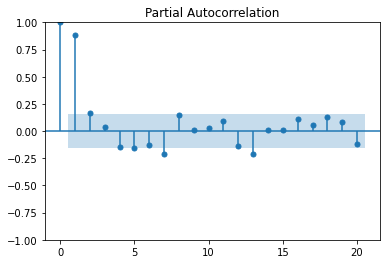

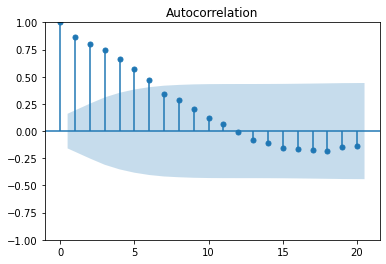

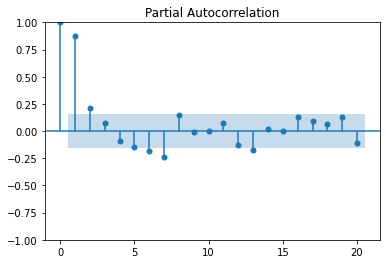

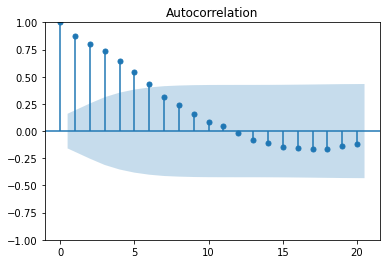

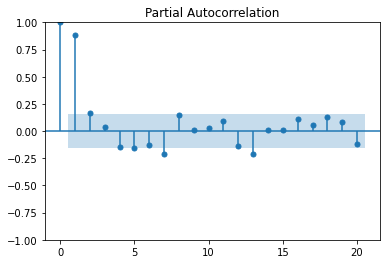

In [10]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot_train.dropna(), lags = 20)
plot_pacf(spot_train.dropna(), lags = 20)


print("ACF and PACF logs:")
plot_acf(np.log(spot_train.dropna()), lags = 20)
plot_pacf(np.log(spot_train.dropna()), lags = 20)



0.6782943507735172

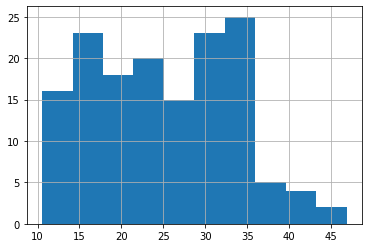

In [11]:
spot_train.hist()
0.6782943507735172

<AxesSubplot:>

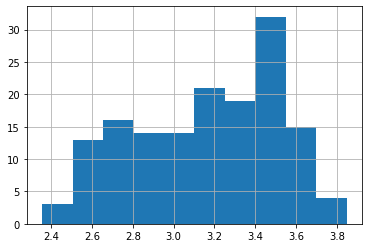

In [12]:
np.log(spot_train).hist()

In [13]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=(spot_train.shape[0]))
#train, test = model_selection.train_test_split(data, train_size=(spot.shape[0]-1))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=860.685, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1419.074, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=868.480, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1253.312, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=859.843, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1220.646, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=857.778, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=860.443, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=855.109, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=976.988, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=860.755, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=856.526, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=856.834, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1075.5

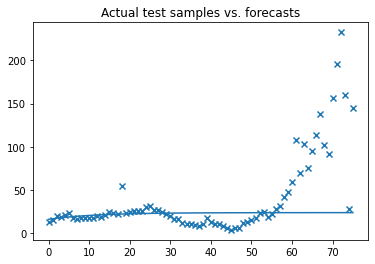

In [48]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [15]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -423.413
Date:                Sat, 07 Jan 2023   AIC                            854.826
Time:                        17:58:47   BIC                            866.895
Sample:                             0   HQIC                           859.729
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4823      1.136      2.185      0.029       0.256       4.709
ar.L1          0.6728      0.062     10.856      0.000       0.551       0.794
ar.L2          0.2233      0.063      3.537      0.000       0.100       0.347
sigma2        15.8104      1.240     12.754      0.000      13.381      18.240
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                51.59
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.12
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

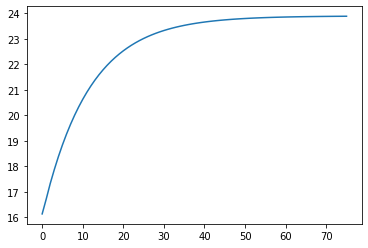

In [16]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [17]:
arima.predict(n_periods=test.shape[0])

array([16.13673165, 16.71881482, 17.33406098, 17.8779775 , 18.38131153,
       18.84141286, 19.26336519, 19.64999683, 20.00434592, 20.32908809,
       20.62670192, 20.89945249, 21.1494172 , 21.37849955, 21.58844409,
       21.7808496 , 21.95718133, 22.11878209, 22.26688253, 22.40261048,
       22.52699955, 22.64099702, 22.74547099, 22.84121708, 22.92896443,
       23.00938126, 23.08307997, 23.15062181, 23.21252111, 23.26924927,
       23.3212383 , 23.3688841 , 23.41254951, 23.45256706, 23.48924149,
       23.5228521 , 23.55365484, 23.58188428, 23.6077554 , 23.63146521,
       23.65319428, 23.67310808, 23.69135825, 23.70808378, 23.72341204,
       23.73745976, 23.75033392, 23.76213255, 23.77294551, 23.78285514,
       23.79193691, 23.80025998, 23.80788773, 23.81487825, 23.82128477,
       23.82715609, 23.8325369 , 23.8374682 , 23.84198753, 23.84612931,
       23.84992508, 23.85340375, 23.8565918 , 23.85951352, 23.86219116,
       23.8646451 , 23.86689404, 23.8689551 , 23.87084398, 23.87

In [42]:
#ch = pm.arima.CHTest(12)
#ch.estimate_seasonal_differencing_term(spot_train)

#ocsb = pm.arima.OCSBTest(12)
#ocsb.estimate_seasonal_differencing_term(spot_train)

#pm.arima.KPSSTest().should_diff(spot_train)

0

<AxesSubplot:xlabel='Timestamp'>

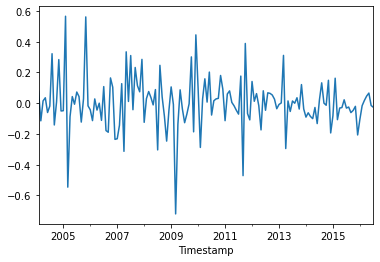

In [29]:
spot2 = np.log(spot).diff()
#spot2 = spot.diff()
spot_train2 = spot2.loc[:'2016-07-31'].dropna()
spot_train2.plot()


In [30]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot_train2.describe()
#spot.dropna().describe()

count    150.000000
mean       0.000874
std        0.169671
min       -0.719761
25%       -0.070901
50%       -0.005126
75%        0.071322
max        0.565226
Name: TRNLTTFD1 USD, dtype: float64

In [31]:
print("Skewness spot:", scipy.stats.skew(spot_train2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot_train2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot_train2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot_train2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.11313191592293192
Kurtosis spot: 6.527944151503723
JB spot: Jarque_beraResult(statistic=78.10990786081815, pvalue=0.0)
Q(6) spot:      lb_stat  lb_pvalue
6  12.249458    0.05663


In [32]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot_train2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot_train2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-15.258991798877455, 4.890429632601666e-28, 0, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, -112.92358744810298)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -15.311
P-value                         0.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [33]:
print("KPSS spot:", KPSS(spot_train2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.115
P-value                         0.518
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


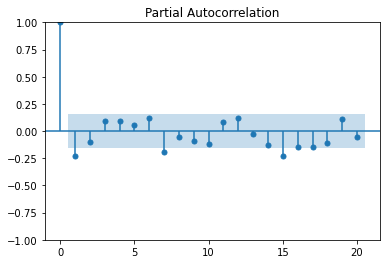

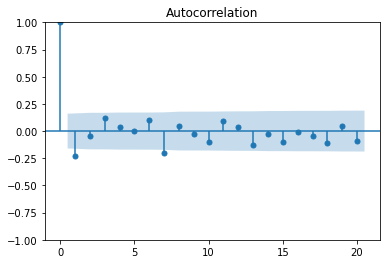

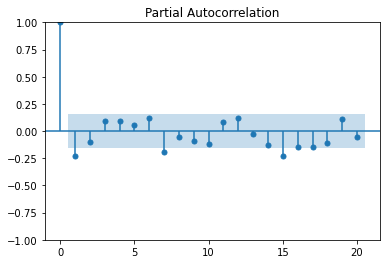

In [35]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot_train2.dropna(), lags = 20)
plot_pacf(spot_train2.dropna(), lags = 20)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

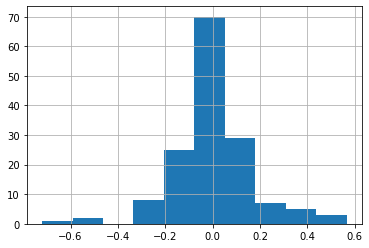

In [36]:
spot_train2.hist()


In [37]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=(spot_train2.shape[0]))

In [38]:
train2

array([ 7.85503880e-02, -1.14653798e-01,  1.48587758e-02,  3.52338468e-02,
       -6.05425503e-02, -1.87026596e-02,  3.21652204e-01, -1.41529092e-01,
        8.30274404e-03,  2.83402626e-01, -5.05327997e-02, -4.89114119e-02,
        5.65225562e-01, -5.45731853e-01, -8.75978642e-02,  4.30012905e-02,
       -6.69037223e-03,  7.26218797e-02,  4.28864631e-02, -1.22778436e-01,
        2.85541684e-02,  5.60843035e-01, -1.72163362e-02, -4.27356896e-02,
       -1.13268964e-01,  2.77345042e-02, -4.47000985e-02,  6.83276680e-05,
       -1.11645960e-01,  1.07891849e-01, -1.77890142e-01, -1.88773753e-01,
        1.64263310e-01,  1.04224308e-01, -2.35007251e-01, -2.31118352e-01,
       -1.43375923e-01,  1.26960172e-01, -3.12954964e-01,  3.33910892e-01,
        1.12244838e-02,  3.09732418e-01, -4.23633544e-02,  2.32152433e-01,
        1.14068476e-01,  7.40899928e-02,  2.84807327e-01, -1.24359207e-01,
        2.94141269e-02,  7.57497279e-02,  3.70991749e-02, -1.11408086e-02,
        8.84760800e-02, -

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-108.417, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-105.487, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-111.262, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-111.970, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-109.993, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-110.036, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-108.180, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-109.976, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.174 seconds


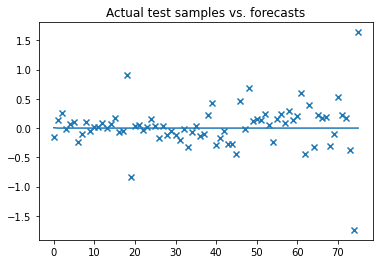

In [39]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [40]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  57.985
Date:                Sat, 31 Dec 2022   AIC                           -111.970
Time:                        14:26:16   BIC                           -105.948
Sample:                             0   HQIC                          -109.523
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2358      0.065     -3.629      0.000      -0.363      -0.108
sigma2         0.0270      0.002     13.905      0.000       0.023       0.031
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                67.81
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

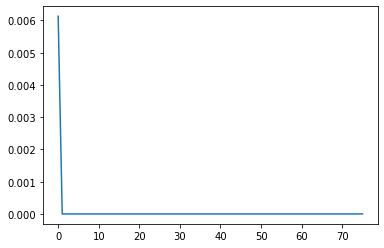

In [41]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [42]:
tests = arima2.predict(n_periods=test2.shape[0])
tests

array([0.00613187, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

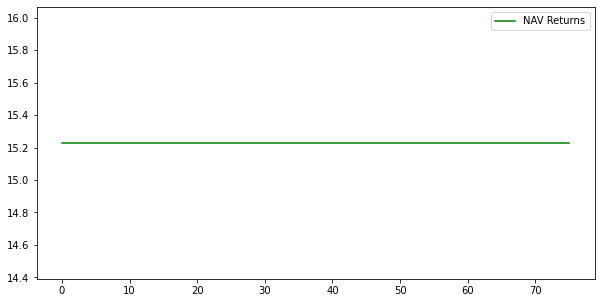

In [43]:
cum_res = np.exp(tests.cumsum())*spot.iloc[spot_train.shape[0]-1]
#cum_res = tests.cumsum()+spot.iloc[spot_train.shape[0]-1]
plt.figure(figsize=(10,5))
plt.plot(cum_res, color='g',label = 'NAV Returns')
plt.legend()
plt.show()

In [44]:
cum_res

array([15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22844318,
       15.22844318, 15.22844318, 15.22844318, 15.22844318, 15.22

In [36]:
#cointegration tests

#normalized cv
#LR test

In [37]:
#correlaatiomatriisi

In [38]:
#np.argwhere(np.isnan(x))